# Linear Algebra ([docs](https://docs.julialang.org/en/v1.0.0/stdlib/LinearAlgebra/))

Since **quantum mechanics is linear algebra in disguise**, most quantum algorithms involve matrix operations.

After `using LinearAlgebra`, **Julia speaks linear algebra fluently**.

Performing linear algebra operations on a computer is, of course, an old problem. Lots of amazing libraries have been written - mostly in Fortran - which have been optimized over decades.

Basically all high-level programming languages use these libraries, including R, Python, and Julia.

Linear algebra in Julia is largely implemented by calling [BLAS](http://www.netlib.org/blas/)/[LAPACK](http://www.netlib.org/lapack/) functions. Sparse operations utilize functionality in [SuiteSparse](http://faculty.cse.tamu.edu/davis/suitesparse.html).

As per default, Julia uses the [OpenBLAS](https://github.com/xianyi/OpenBLAS) implementation (BLAS, LAPACK, LIBM), which can be replaced by [Intel's MKL](https://software.intel.com/en-us/mkl) (BLAS, LAPACK) and [Intel's Math Library](https://software.intel.com/en-us/node/522653) (LIBM).

**What is all this stuff?!?**

* **BLAS**: a collection of low-level matrix and vector arithmetic operations ("multiply two matrices", "multiply a matrix by vector").
* **LAPACK**:  a collection of higher-level linear algebra operations. Things like matrix factorizations (LU, LLt, QR, SVD, Schur, etc) that are used to do things like “find the eigenvalues of a matrix”, or “find the singular values of a matrix”, or “solve a linear system”.
* **LIBM**: basic math functions like `sin`, `cos`, `sinh`, etcetera

Sparse matrices are more difficult and there exist different collections of routines, one of which is **SuiteSparse**.

**Why do I have to care?**

* Switching from OpenBLAS to MKL can give you large speedups!
* Since you might be leaving the world of Julia code, you loose easy inspectability and type genericity. The latter can be an issue for machine learning, as we'll discuss later in more detail.

# Taking linear algebra seriously

In [1]:
using LinearAlgebra

In [3]:
A = rand(4,4)

4×4 Array{Float64,2}:
 0.655846   0.42398   0.945025  0.0825272
 0.254999   0.836135  0.378179  0.683137 
 0.539871   0.187674  0.482166  0.0289349
 0.0863307  0.571019  0.560131  0.459718 

In [4]:
typeof(A)

Array{Float64,2}

In [5]:
Array{Float64, 2} === Matrix{Float64} # equivalent not just equal

true

In [13]:
det(A)

-0.01554909789427472

In [14]:
inv(A)

4×4 Array{Float64,2}:
 -1.87369    0.459296    4.00724  -0.598368
  8.85059    4.88241   -11.7621   -8.10373 
 -0.764268  -2.20691     1.43897   3.32607 
 -9.71031   -3.46178    12.104     8.30075 

In [15]:
rank(A)

4

In [16]:
A + 3

MethodError: MethodError: no method matching +(::Array{Float64,2}, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:292
  +(!Matched::Missing, ::Number) at missing.jl:97
  ...

Julia is [taking linear algebra seriously](https://www.youtube.com/watch?v=C2RO34b_oPM)! (see [here](https://github.com/JuliaLang/julia/issues/4774), and [here](https://github.com/JuliaLang/julia/issues/20978)).

In [17]:
A + 3I

4×4 Array{Float64,2}:
 3.65585    0.42398   0.945025  0.0825272
 0.254999   3.83614   0.378179  0.683137 
 0.539871   0.187674  3.48217   0.0289349
 0.0863307  0.571019  0.560131  3.45972  

In [18]:
A .+ 3

4×4 Array{Float64,2}:
 3.65585  3.42398  3.94502  3.08253
 3.255    3.83614  3.37818  3.68314
 3.53987  3.18767  3.48217  3.02893
 3.08633  3.57102  3.56013  3.45972

Let's get a vector as well

In [19]:
v = rand(4)

4-element Array{Float64,1}:
 0.5719801313775803 
 0.4284641720171052 
 0.30225331357765683
 0.18088970377804214

In [20]:
typeof(v)

Array{Float64,1}

In [21]:
Array{Float64,1} === Vector{Float64}

true

In [22]:
norm(v)

0.796756529872582

In [24]:
v^2 # can't square a vector

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:124
  ^(!Matched::Missing, ::Number) at missing.jl:97
  ...

In [25]:
v.^2

4-element Array{Float64,1}:
 0.32716127069071405
 0.1835815467023035 
 0.09135706556867336
 0.03272108493290783

Some things might be suprising

In [26]:
1/v

1×4 Transpose{Float64,Array{Float64,1}}:
 0.90101  0.674937  0.476124  0.284946

But if it works, there is typically meaning to it. In this case it is calculating the [Moore-Penrose-Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Vectors) (`transpose(v)/sum(abs2,v)`).

# Matrix factorizations

[Matrix factorizations (a.k.a. matrix decompositions)](https://en.wikipedia.org/wiki/Matrix_decomposition)
compute the factorization of a matrix into a product of matrices, and are one of the central concepts
in linear algebra.

Example: `Ax = b`

In [52]:
A = rand(1:10, 5, 5)

5×5 Array{Int64,2}:
  6  9  7  3  10
 10  9  7  9   3
  3  3  8  8   6
 10  7  7  8   9
  3  8  4  2   5

In [53]:
b = rand(5)

5-element Array{Float64,1}:
 0.5230913150502627 
 0.8594090644973507 
 0.04716642482810518
 0.11956426866373504
 0.694194406137143  

Solve explicitly

In [54]:
inv(A)*b

5-element Array{Float64,1}:
 -0.007419566758833651
  0.11897423493298578 
  0.07790192796481138 
 -0.045424075271688735
 -0.0912200668732221  

Solve by left division `\`

In [55]:
A\b

5-element Array{Float64,1}:
 -0.007419566758833633
  0.11897423493298583 
  0.07790192796481131 
 -0.04542407527168865 
 -0.0912200668732221  

In [56]:
using BenchmarkTools
@btime inv($A)*$b; # it is almost never necessary to calculate the dense inverse
@btime $A\$b;

  1.040 μs (7 allocations: 3.50 KiB)
  314.348 ns (4 allocations: 576 bytes)


What does Julia do to make this so much faster?

It knows that it can perform the division much faster if it first [LU decomposes](https://en.wikipedia.org/wiki/LU_decomposition) `A`.

In [57]:
lu(A)\b

5-element Array{Float64,1}:
 -0.007419566758833633
  0.11897423493298583 
  0.07790192796481131 
 -0.04542407527168865 
 -0.0912200668732221  

In [58]:
@btime lu($A)\$b

  295.371 ns (4 allocations: 576 bytes)


5-element Array{Float64,1}:
 -0.007419566758833633
  0.11897423493298583 
  0.07790192796481131 
 -0.04542407527168865 
 -0.0912200668732221  

Let's inspect the output of `lu(A)`

In [59]:
lu(A)

LU{Float64,Array{Float64,2}}
L factor:
5×5 Array{Float64,2}:
 1.0       0.0        0.0        0.0      0.0
 1.66667   1.0        0.0        0.0      0.0
 0.5       0.25       1.0        0.0      0.0
 1.66667   1.33333    0.27451    1.0      0.0
 0.5      -0.583333  -0.392157  -1.29847  1.0
U factor:
5×5 Array{Float64,2}:
 6.0   9.0   7.0       3.0       10.0    
 0.0  -6.0  -4.66667   4.0      -13.6667 
 0.0   0.0   5.66667   5.5        4.41667
 0.0   0.0   0.0      -3.84314    9.34314
 0.0   0.0   0.0       0.0        5.89158

In [60]:
typeof(lu(A))

LU{Float64,Array{Float64,2}}

In [61]:
supertype(LU)

Factorization

### List of factorizations

The following table summarizes the types of matrix factorizations that have been implemented in
Julia. Details of their associated methods can be found in the [Standard Functions](https://docs.julialang.org/en/latest/stdlib/LinearAlgebra/#Standard-Functions-1) section
of the Linear Algebra documentation.

| Type              | Description                                                                                                    |
|:----------------- |:-------------------------------------------------------------------------------------------------------------- |
| `Cholesky`        | [Cholesky factorization](https://en.wikipedia.org/wiki/Cholesky_decomposition)                                 |
| `CholeskyPivoted` | [Pivoted](https://en.wikipedia.org/wiki/Pivot_element) Cholesky factorization                                  |
| `LU`              | [LU factorization](https://en.wikipedia.org/wiki/LU_decomposition)                                             |
| `LUTridiagonal`   | LU factorization for [`Tridiagonal`](@ref) matrices                                                            |
| `QR`              | [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition)                                             |
| `QRCompactWY`     | Compact WY form of the QR factorization                                                                        |
| `QRPivoted`       | Pivoted [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition)                                     |
| `Hessenberg`      | [Hessenberg decomposition](http://mathworld.wolfram.com/HessenbergDecomposition.html)                          |
| `Eigen`           | [Spectral decomposition](https://en.wikipedia.org/wiki/Eigendecomposition_(matrix))                            |
| `SVD`             | [Singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)                     |
| `GeneralizedSVD`  | [Generalized SVD](https://en.wikipedia.org/wiki/Generalized_singular_value_decomposition#Higher_order_version) |

(Taken from the Julia docs)

In [62]:
@btime lu($A)\$b
@btime qr($A)\$b
@btime svd($A)\$b;

  297.207 ns (4 allocations: 576 bytes)
  4.057 μs (9 allocations: 1.48 KiB)
  8.633 μs (18 allocations: 4.91 KiB)


From the documentation (`?\`) of the left division operator:

>Matrix division using a polyalgorithm. For input matrices A and B, the result X is such that A*X == B when A is square. The solver that is used depends upon the structure of A. If A is upper or lower triangular (or diagonal), no factorization of A is required and the system is solved with either forward or backward substitution.

This is what the actual heuristic looks like (`@which`/`@edit` are your friends!)

```julia
function (\)(A::AbstractMatrix, B::AbstractVecOrMat)
    @assert !has_offset_axes(A, B)
    m, n = size(A)
    if m == n
        if istril(A)
            if istriu(A)
                return Diagonal(A) \ B
            else
                return LowerTriangular(A) \ B
            end
        end
        if istriu(A)
            return UpperTriangular(A) \ B
        end
        return lu(A) \ B
    end
    return qr(A,Val(true)) \ B
end
```

Generically, a heuristic is implemented in `factorize`:

In [65]:
typeof(factorize(A))

LU{Float64,Array{Float64,2}}

In [66]:
typeof(factorize(A+A'))

BunchKaufman{Float64,Array{Float64,2}}

# Fast linear algebra with multiple dispatch

Ok, we've seen that Julia analyses the input matrix using some heuristic, factorizes it appropriately to then perform the calculation efficiently. 

But we can (and probably should) also be more explicit about our input to avoid this heuristic. We can encode the special structure of our matrix in a type such that we directly dispatch to the efficient method. Remember, the types decide which method is actually being run!

There are many reasons to indicate what kind of matrix we have.

* Don't rely on a heuristic. Not all methods have one!
* The heurisitc comes with a small performance penalty.
* The heurisitc isn't perfect and might fail to notice our matrix's special structure. Maybe because it's not known to base Julia. As we'll see later on, many external packages define additional special matrix types and efficient procedures for them.

The following special matrix types are available out-of-the-box.

### Standard matrix types

>[Matrices with special symmetries and structures](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=3274)
arise often in linear algebra and are frequently associated with various matrix factorizations.
Julia features a rich collection of special matrix types, which allow for fast computation with
specialized routines that are specially developed for particular matrix types.
>
>The following tables summarize the types of special matrices that have been implemented in Julia,
as well as whether hooks to various optimized methods for them in LAPACK are available.

| Type                      | Description                                                                      |
|:------------------------- |:-------------------------------------------------------------------------------- |
| [`Symmetric`](@ref)       | [Symmetric matrix](https://en.wikipedia.org/wiki/Symmetric_matrix)               |
| [`Hermitian`](@ref)       | [Hermitian matrix](https://en.wikipedia.org/wiki/Hermitian_matrix)               |
| [`UpperTriangular`](@ref) | Upper [triangular matrix](https://en.wikipedia.org/wiki/Triangular_matrix)       |
| [`LowerTriangular`](@ref) | Lower [triangular matrix](https://en.wikipedia.org/wiki/Triangular_matrix)       |
| [`Tridiagonal`](@ref)     | [Tridiagonal matrix](https://en.wikipedia.org/wiki/Tridiagonal_matrix)           |
| [`SymTridiagonal`](@ref)  | Symmetric tridiagonal matrix                                                     |
| [`Bidiagonal`](@ref)      | Upper/lower [bidiagonal matrix](https://en.wikipedia.org/wiki/Bidiagonal_matrix) |
| [`Diagonal`](@ref)        | [Diagonal matrix](https://en.wikipedia.org/wiki/Diagonal_matrix)                 |
| [`UniformScaling`](@ref)  | [Uniform scaling operator](https://en.wikipedia.org/wiki/Uniform_scaling)        |

(Taken from the Julia docs)

In [67]:
D = Diagonal(1:5)

5×5 Diagonal{Int64,UnitRange{Int64}}:
 1  ⋅  ⋅  ⋅  ⋅
 ⋅  2  ⋅  ⋅  ⋅
 ⋅  ⋅  3  ⋅  ⋅
 ⋅  ⋅  ⋅  4  ⋅
 ⋅  ⋅  ⋅  ⋅  5

In [68]:
Ddense = Matrix(D) # same matrix but type doesn't indicate diagonal structure

5×5 Array{Int64,2}:
 1  0  0  0  0
 0  2  0  0  0
 0  0  3  0  0
 0  0  0  4  0
 0  0  0  0  5

In [69]:
@btime $D*$b
@btime $Ddense*$b

  34.038 ns (1 allocation: 128 bytes)
  55.793 ns (1 allocation: 128 bytes)


5-element Array{Float64,1}:
 0.5230913150502627 
 1.7188181289947013 
 0.14149927448431554
 0.47825707465494016
 3.470972030685715  

What method does it dispatch to?

In [70]:
@which D*b

*(D::Diagonal, V::AbstractArray{T,1} where T) in LinearAlgebra at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\LinearAlgebra\src\diagonal.jl:163

In [71]:
@which Ddense*b

*(A::AbstractArray{T,2}, x::AbstractArray{S,1}) where {T, S} in LinearAlgebra at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\LinearAlgebra\src\matmul.jl:49

**Dense Diagonal** (`Ddense*b`)

```julia
function (*)(A::AbstractMatrix{T}, x::AbstractVector{S}) where {T,S}
    TS = promote_op(matprod, T, S)
    mul!(similar(x,TS,axes(A,1)),A,x)
end
```

**Diagonal** (`D*b`)
```julia
(*)(D::Diagonal, V::AbstractVector) = D.diag .* V
```

# Fermions hopping on a chain

$$\mathcal{H} = -t\sum_{\langle i,j \rangle} c_i^\dagger c_j + \mu \sum_i n_i$$

Here, $t$ is the hopping amplitude, $\mu$ is the chemical potential, and $c, c^\dagger$ are creation and annihilation operators.

For simplicity, we'll consider **open boundary conditions** (not periodic), in which case the Hamiltonian is tridiagonal.

Since the fermions are *not* interacting, we can work in the *single particle basis* and do not have to worry about how to construct a basis for the many-body Fock space.

We use the canonical cartesian basis in which one uses $0$s to indicate empty sites and a $1$ for the particle's site, i.e. $|00100\rangle$ represents the basis state which has the particle exclusively on the 3rd site.

If you aren't familiar with second quantization just think of $\mathcal{H}$ as any quantum mechanical operator that can be represented as a matrix.

In [4]:
N = 100 # number of sites
t = 1
μ = -0.5

H = diagm(0 => fill(μ, N), 1 => fill(-t, N-1), -1 => fill(-t, N-1))

100×100 Array{Float64,2}:
 -0.5  -1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -0.5  -1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0  -0.5  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0  -0.5  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0  -0.5  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0  -0.5  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [7]:
using UnicodePlots
spy(H, canvas=DotCanvas) # sparsity pattern plot

                    Sparsity Pattern
       ┌──────────────────────────────────────────┐    
     1 │::.                                       │ > 0
       │ '::.                                     │ < 0
       │   '::.                                   │    
       │     '::.                                 │    
       │       '::.                               │    
       │         '::.                             │    
       │           '::.                           │    
       │             '::.                         │    
       │               '::.                       │    
       │                 '::.                     │    
       │                   '::.                   │    
       │                     '::.                 │    
       │                       '::.               │    
       │                         '::.             │    
       │                           '::.           │    
       │                             '::.         │    
       │   

In [9]:
ψ = normalize(rand(N)); # some state

In [12]:
ev(H, ψ) = ψ'*H*ψ # <φ|H|φ>

ev (generic function with 1 method)

In [13]:
ev(H, ψ)

-1.8570774574976836

In [14]:
@btime ev($H, $ψ);

  10.599 μs (1 allocation: 896 bytes)


In [15]:
typeof(H)

Array{Float64,2}

As long as the code is generic (respects the informal `AbstractArray` interface), we can use the same piece of code for completely different array types.

Let's utilize the sparsity of `H` by indicating it through a type.

In [16]:
using SparseArrays
Hsparse = sparse(H)

100×100 SparseMatrixCSC{Float64,Int64} with 298 stored entries:
  [1  ,   1]  =  -0.5
  [2  ,   1]  =  -1.0
  [1  ,   2]  =  -1.0
  [2  ,   2]  =  -0.5
  [3  ,   2]  =  -1.0
  [2  ,   3]  =  -1.0
  [3  ,   3]  =  -0.5
  [4  ,   3]  =  -1.0
  [3  ,   4]  =  -1.0
  [4  ,   4]  =  -0.5
  [5  ,   4]  =  -1.0
  [4  ,   5]  =  -1.0
  ⋮
  [97 ,  96]  =  -1.0
  [96 ,  97]  =  -1.0
  [97 ,  97]  =  -0.5
  [98 ,  97]  =  -1.0
  [97 ,  98]  =  -1.0
  [98 ,  98]  =  -0.5
  [99 ,  98]  =  -1.0
  [98 ,  99]  =  -1.0
  [99 ,  99]  =  -0.5
  [100,  99]  =  -1.0
  [99 , 100]  =  -1.0
  [100, 100]  =  -0.5

In [17]:
@btime ev($Hsparse, $ψ);

  384.319 ns (2 allocations: 912 bytes)


That's a solid **30x speedup**!

Our `H` isn't just sparse, but actually tridiagonal. Let's try to exploit that.

In [18]:
Htri = Tridiagonal(H)

100×100 Tridiagonal{Float64,Array{Float64,1}}:
 -0.5  -1.0    ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0  -0.5  -1.0    ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0  -0.5  -1.0    ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0  -0.5  -1.0    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0  -0.5  -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0  -0.5  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅    

In [19]:
@btime ev($Htri, $ψ);

  174.317 ns (4 allocations: 976 bytes)


Choosing the best type (and therewith an algorithm) can be tricky and one has to play around a bit. The good thing is that it's very easy to try out different types!

Note that there are also great matrix types available in the ecosystem, see [JuliaMatrices](https://github.com/JuliaMatrices), for example.

# Exact diagonalisation a.k.a Eigendecomposition

To diagonalize our dense "Hamiltonian", we simply call the built-in function `eigen`.

In [59]:
vals, vecs = eigen(H)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
100-element Array{Float64,1}:
 -2.4990325645839753
 -2.4961311942671887
 -2.4912986959380365
 -2.484539744726553 
 -2.475860879481513 
 -2.4652704964445267
 -2.4527788411272136
 -2.438397998399332 
 -2.422141880797449 
 -2.4040262150654583
 -2.384068526939977 
 -2.3622881241953175
 -2.3387060779644715
  ⋮                 
  1.362288124195319 
  1.3840685269399784
  1.4040262150654599
  1.422141880797449 
  1.4383979983993322
  1.452778841127214 
  1.4652704964445273
  1.4758608794815133
  1.484539744726553 
  1.4912986959380372
  1.4961311942671887
  1.4990325645839762
eigenvectors:
100×100 Array{Float64,2}:
 0.00437636  -0.00874848  0.0131121  -0.0174631  …   0.00874848  -0.00437636
 0.00874848  -0.0174631   0.0261102  -0.0346562     -0.0174631    0.00874848
 0.0131121   -0.0261102   0.038881   -0.0513136      0.0261102   -0.0131121 
 0.0174631   -0.0346562   0.0513136  -0.0671776     -0.0346562    0.0174631 
 0.021

In [60]:
ψ0 = vecs[:,1] # single-particle groundstate

100-element Array{Float64,1}:
 0.004376357346900525 
 0.008748480850710498 
 0.013112140764309128 
 0.017463115528552488 
 0.02179719585635938  
 0.026110188804924692 
 0.030397921832121047 
 0.03465624683316357  
 0.03888104415363324  
 0.04306822657497679  
 0.04721374326862623  
 0.05131358371491453  
 0.055363781582994064 
 ⋮                    
 0.05131358371495845  
 0.04721374326866721  
 0.04306822657501444  
 0.03888104415366729  
 0.03465624683319377  
 0.03039792183214743  
 0.026110188804947167 
 0.02179719585637802  
 0.017463115528567313 
 0.013112140764320258 
 0.008748480850717935 
 0.0043763573469042276

In [61]:
ev(H, ψ0)

-2.4990325645839753

In [62]:
ev(H, ψ0) <= ev(H, ψ) # groundstate has the lowest energy

true

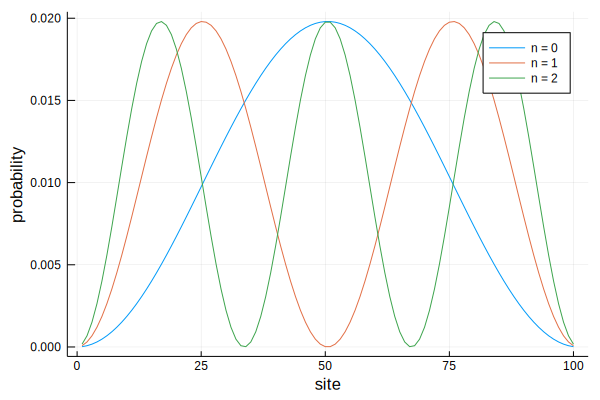

In [63]:
using Plots

show_n_states = 3

p = plot()
for i in 1:show_n_states
    plot!(p, abs2.(vecs[:,i]), xlab="site", ylab="probability", lab="n = $(i-1)")
end
p

In [58]:
# Periodic boundary conditions
# T = copy(H)
# T[1,end] = -t
# T[end,1] = -t
# vals, vecs = eigen(T)

Since Julia is using eigenproblem solvers from LAPACK (written in a low-level language) the code is, of course, **not generic**.

The best Julia can do, without implementing new functionality, is manually dispatch to the best LAPACK routine available.

Hence, it won't work with most of our special matrices.

In [35]:
eigen(Htri);

MethodError: MethodError: no method matching eigen(::Tridiagonal{Float64,Array{Float64,1}})
Closest candidates are:
  eigen(::AbstractArray{TA,2}, !Matched::AbstractArray{TB,2}) where {TA, TB} at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\LinearAlgebra\src\eigen.jl:382
  eigen(!Matched::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\LinearAlgebra\src\tridiag.jl:201
  eigen(!Matched::SymTridiagonal{T,V} where V<:AbstractArray{T,1}, !Matched::UnitRange) where T at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\LinearAlgebra\src\tridiag.jl:205
  ...

If we're lucky, someone has implemented a generic solver in Julia that works for a wider range of types. Example:

In [23]:
Hbig = big.(H)
eigen(Hermitian(Hbig));

In [24]:
using GenericLinearAlgebra

In [25]:
eigen(Hermitian(Hbig));

Arguably the most important matrix type in physics applications is a sparse matrix, i.e. `SparseMatrixCSC`.

In [27]:
eigen(Hsparse)

ErrorException: eigen(A) not supported for sparse matrices. Use for example eigs(A) from the Arpack package instead.

Let's follow Julia's advice and take a look at [ARPACK.jl](https://github.com/JuliaLinearAlgebra/Arpack.jl).

### Diagonalizing sparse matrices

[ARPACK.jl]() -  Wrapper to Fortran library [ARPACK](https://www.caam.rice.edu/software/ARPACK/) which implements **iterative** eigenvalue and singular value solvers. By far the most established sparse eigensolver.

Julia implementations:

* [ArnoldiMethod.jl](https://github.com/haampie/ArnoldiMethod.jl)
* [KrylovKit.jl](https://github.com/Jutho/KrylovKit.jl)
* [IterativeSolvers.jl](https://github.com/JuliaMath/IterativeSolvers.jl)
* and more


A key thing to remember is that while `eigen` is - up to numerical errors - exact, the methods in the packages above are iterative and approximative.

Arpack uses a different name for the eigenvalue decomposition. They called it `eigs`.

In [49]:
using Arpack
λ, evs = eigs(Hsparse)

([-2.49903, -2.49613, -2.4913, -2.48454, -2.47586, -2.46527], [0.00437636 0.00874848 … -0.0217972 -0.0261102; -0.00874848 -0.0174631 … 0.0430682 0.0513136; … ; 0.00874848 -0.0174631 … -0.0430682 0.0513136; -0.00437636 0.00874848 … 0.0217972 -0.0261102], 6, 25, 328, [-0.121471, 0.00949129, 0.101141, -0.160788, -0.0368292, 0.218783, 0.139045, 0.246895, 0.18116, -0.0681466  …  -4.82843e-5, 0.0310503, -0.00420781, 0.0121782, -0.0147454, 0.0311968, 0.15576, -0.240861, 0.170909, 0.0737687])

In [50]:
λ

6-element Array{Float64,1}:
 -2.4990325645839877
 -2.4961311942671984
 -2.491298695938035 
 -2.4845397447265594
 -2.475860879481515 
 -2.4652704964445236

For ArnoldiMethod, one has to go through a two-step process.

In [51]:
using ArnoldiMethod
decomp, history = partialschur(Hsparse)
λ, evs = partialeigen(decomp);

In [52]:
λ

6-element Array{Float64,1}:
 -2.4990325645839913
 -2.4961311942671816
 -2.4912986959380383
 -2.484539744726538 
 -2.4758608794815165
 -2.4652704964445316

In KrylovKit, they call the function `eigsolve`.

In [76]:
using KrylovKit
λ, evs = eigsolve(Hsparse);

In [77]:
λ

5-element Array{Float64,1}:
 -2.4990325645839753
 -2.496131194267191 
 -2.4912986959380388
 -2.4845397447265523
 -2.475860879481518 

# Core messages of this Notebook

* The standard libraries `LinearAlgebra` and `SparseArrays` make Julia speak linear algebra.
* **Indicate properties and structure of a matrix**, like hermiticity or sparsity, through types. Fallback to generic types only if you run into method errors.
* For **sparse matrix exact diagonalization**, ARPACK.jl is sort of a standard but there are great alternatives like ArnoldiMethods.jl.

# If time permits: Dude, I have a GPU!

To make another case for *generic programming*, if you want to move the calculation to a GPU, chances are you only have to change the type of your matrix!

 Of course, this is only true if you have one :)

In [118]:
using GPUArrays

┌ Info: Precompiling GPUArrays [0c68f7d7-f131-5f86-a1c3-88cf8149b2d7]
└ @ Base loading.jl:1186


In [122]:
# Hgpu = CuArray(H) # CUDA, CuArrays.jl
# Hgpu = CLArray(H) # Open-CL, CLArrays.jl
Hgpu = JLArray(H) # I don't have a GPU so I'll take a fake GPU Array on the CPU :)

100×100 JLArray{Float64,2}:
 -0.5   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -0.5   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -0.5   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -0.5   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -0.5   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -0.5  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0

In [123]:
@btime ev($Hgpu); # of course it's no faster without a real GPU :)

ErrorException: conversion to pointer not defined for JLArray{Float64,2}

With `DistributedArray`, which is similar in spirit, we'll learn about another type that affects *where* a computation is happening in the parallel computing part of the workshop.